In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sagemaker
import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from functools import reduce

In [2]:
#df = pd.read_feather('s3://haseebdata/Dataset/Dataset.ftr')
Ed = pd.read_feather('s3://haseebdata/Dataset/EDNET.ftr')
dfq = pd.read_feather('s3://haseebdata/Dataset/dfq.ftr')
dfu = pd.read_feather('s3://haseebdata/Dataset/Users.ftr')

In [3]:
Ed.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,part,tags,deployed_at,correct
0,1565096190868,1,5012,b,38000,1,c,3544,3544,5,74,2019-09-17 02:43:28.616,0.0
1,1565096221062,2,4706,c,24000,1,c,3238,3238,5,71,2019-10-30 05:34:30.723,1.0
2,1565096293432,3,4366,b,68000,1,b,2898,2898,5,103,2019-10-30 05:37:51.451,1.0
3,1565096339668,4,4829,a,42000,1,c,3361,3361,5,83,2019-06-24 09:24:51.347,0.0
4,1565096401774,5,6528,b,59000,1,d,5060,5060,5,90,2019-10-17 03:03:15.009,0.0


In [4]:
dfu['Percentage']= dfu['Percentage'].apply(np.ceil)
dfu.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,70.0,36.75
1,10,16,9,7,57.0,27.75
2,100,33,18,15,55.0,34.50
3,1000,1488,930,558,63.0,34.00
4,10000,405,258,147,64.0,25.00


<AxesSubplot:ylabel='Frequency'>

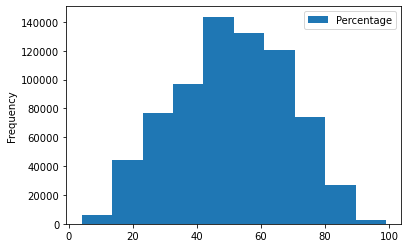

In [5]:
dfu.plot( x='user_iD', y='Percentage', kind='hist')

In [6]:
D2 = dfu.sort_values('user_iD')
D2.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,70.0,36.750
103211,2,1103,765,338,70.0,24.000
205341,3,10,3,7,30.0,38.000
305985,4,2699,1932,767,72.0,27.666
408468,5,1233,754,479,62.0,23.250


In [7]:
Ed['elapsed_time'] = Ed['elapsed_time'].div(1000)
Ed.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,part,tags,deployed_at,correct
0,1565096190868,1,5012,b,38.0,1,c,3544,3544,5,74,2019-09-17 02:43:28.616,0.0
1,1565096221062,2,4706,c,24.0,1,c,3238,3238,5,71,2019-10-30 05:34:30.723,1.0
2,1565096293432,3,4366,b,68.0,1,b,2898,2898,5,103,2019-10-30 05:37:51.451,1.0
3,1565096339668,4,4829,a,42.0,1,c,3361,3361,5,83,2019-06-24 09:24:51.347,0.0
4,1565096401774,5,6528,b,59.0,1,d,5060,5060,5,90,2019-10-17 03:03:15.009,0.0


In [8]:
D3 = Ed.reindex(['user_iD','question_id','user_answer','correct_answer' , 'correct' , 'elapsed_time' , 'solving_id' , 'explanation_id' , 'bundle_id' , 'part' , 'tags' , 'timestamp' , 'deployed_at'], axis=1)

In [9]:
D3= D3.sort_values("user_iD")
D3.head()

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,part,tags,timestamp,deployed_at
0,1,5012,b,c,0.0,38.0,1,3544,3544,5,74,1565096190868,2019-09-17 02:43:28.616
713,1,243,c,c,1.0,21.0,452,243,243,2,27;28;29;185;183,1569366922604,2017-12-29 16:09:30.617
714,1,4135,a,b,0.0,1200.0,453,2667,2667,5,77,1569368176508,2019-09-17 02:35:39.565
715,1,4059,b,a,0.0,218.0,454,2591,2591,5,95,1569368543137,2019-10-30 05:05:19.455
716,1,9010,d,d,1.0,87.0,455,6361,6361,5,133,1569392229981,2019-10-17 03:02:33.457


In [10]:
Inter= D3.groupby(['user_iD', 'question_id']).size().reset_index(name='counts')

In [11]:
Inter.head()

,user_iD,question_id,counts
0,1,7,2
1,1,10,2
2,1,11,1
3,1,13,1
4,1,29,1


In [13]:
d_u = D3.groupby(['user_iD'])
df2 = d_u.agg(Minimum_Date=('timestamp', np.min), Maximum_Date=('timestamp', np.max), index=false)

In [14]:
df2[0:5]

,Minimum_Date,Maximum_Date
user_iD,,
1,1565096190868,1569647443041
2,1506015043018,1567305695137
3,1566620784438,1567142294316
4,1566782278107,1572041297204
5,1546437487910,1567604533505


In [15]:
df2['user_iD'] = dfu['user_iD']

In [16]:
df2.head()

,Minimum_Date,Maximum_Date,user_iD
user_iD,,,
1,1565096190868,1569647443041,10.0
2,1506015043018,1567305695137,100.0
3,1566620784438,1567142294316,1000.0
4,1566782278107,1572041297204,10000.0
5,1546437487910,1567604533505,100001.0


In [18]:
df2.reset_index(drop=True, inplace=True)

In [19]:
df2 = df2.sort_values('user_iD')

In [20]:
df2['Difference'] = df2['Maximum_Date'] - df2['Minimum_Date']
df2.head()

,Minimum_Date,Maximum_Date,user_iD,Difference
102300,1516088126908,1516088329507,2.0,202599
204171,1531537497221,1531537680928,3.0,183707
303291,1541037179213,1541037426943,4.0,247730
403945,1547028469465,1547028698771,5.0,229306
657077,1563804791244,1563804972606,8.0,181362
